In [3]:
import matplotlib.pyplot as plt
import numpy as np

from reservoirpy.nodes import Reservoir

In [4]:
node1 = Reservoir(100, lr=1., input_bias=True, seed=1234)
node2 = Reservoir(50, lr=1., input_bias=True, seed=1234)

node1 = node1 << node2

data = np.sin(np.linspace(1, 100, 1000)).reshape(-1, 1)
res = (node1 >> node2).run(data)

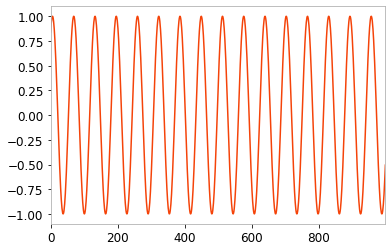

In [5]:
_ = plt.plot(data)

In [6]:
def normal(j, mu, s=5):
    return (1 / s * np.sqrt(2*np.pi)) * np.exp(-0.5*((j - mu) / s)**2)

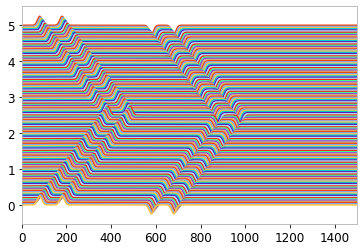

In [7]:
from numpy.random import default_rng

T = 1500
N = 17 * 9
n = N // 2

x = np.linspace(0, 10, T)

offset = np.linspace(0, 5, N)[::-1]
res = np.zeros((N, T, 50))
for i in range(0, N):
    phi1 = 30 + 4 * abs(abs(n - i) - n)
    phi2 = phi1 + 100
    phi3 = phi2 + 400
    phi4 = phi3 + 100
    rng = default_rng(89)
    data = np.zeros((T, 1))
    for j in range(1, 100):
        data[phi1+j:phi1+j+1] = normal(j, mu=50, s=10)
        data[phi2+j:phi2+j+1] = normal(j, mu=50, s=10)
        data[phi3+j:phi3+j+1] = -normal(j, mu=50, s=10)
        data[phi4+j:phi4+j+1] = -normal(j, mu=50, s=10)
    plt.plot(data + offset[i])

    seed=i
    passed = False
    while not passed:
        try:
            res[i] = Reservoir(50,
                               lr=0.1,
                               input_bias=False,
                               input_scaling=5.0,
                               sr=0.9,
                               seed=seed).run(data)
            passed = True
        except Exception as e:
            seed = rng.integers(i, 153613)

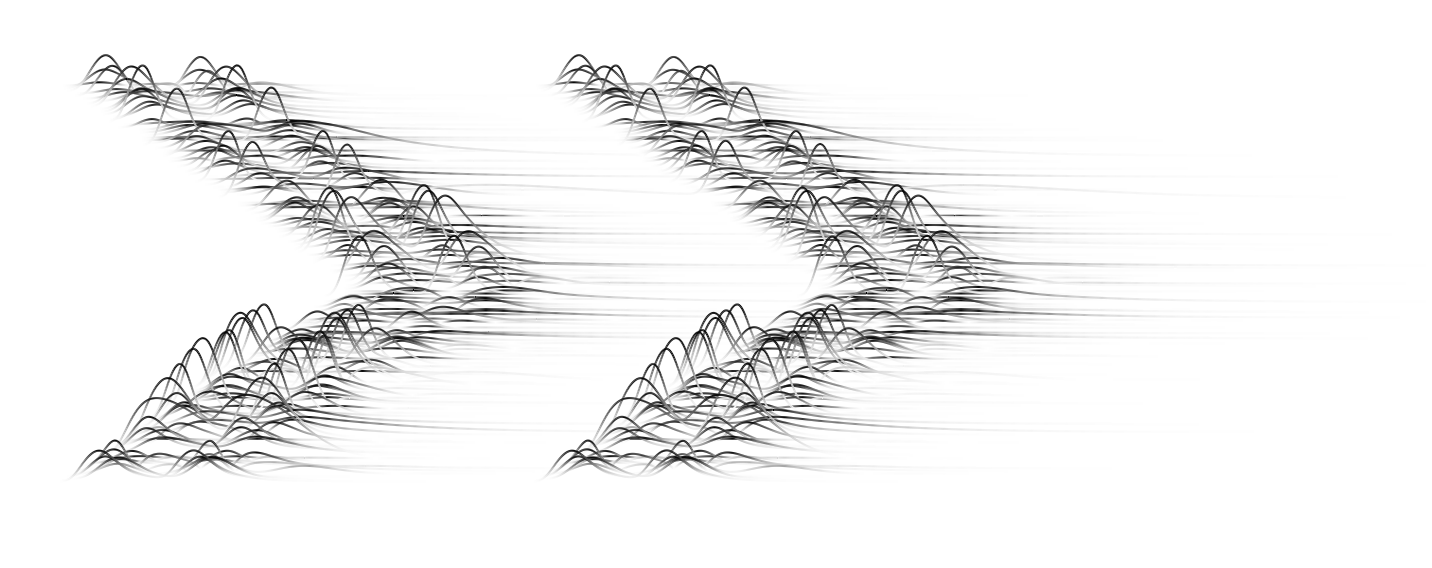

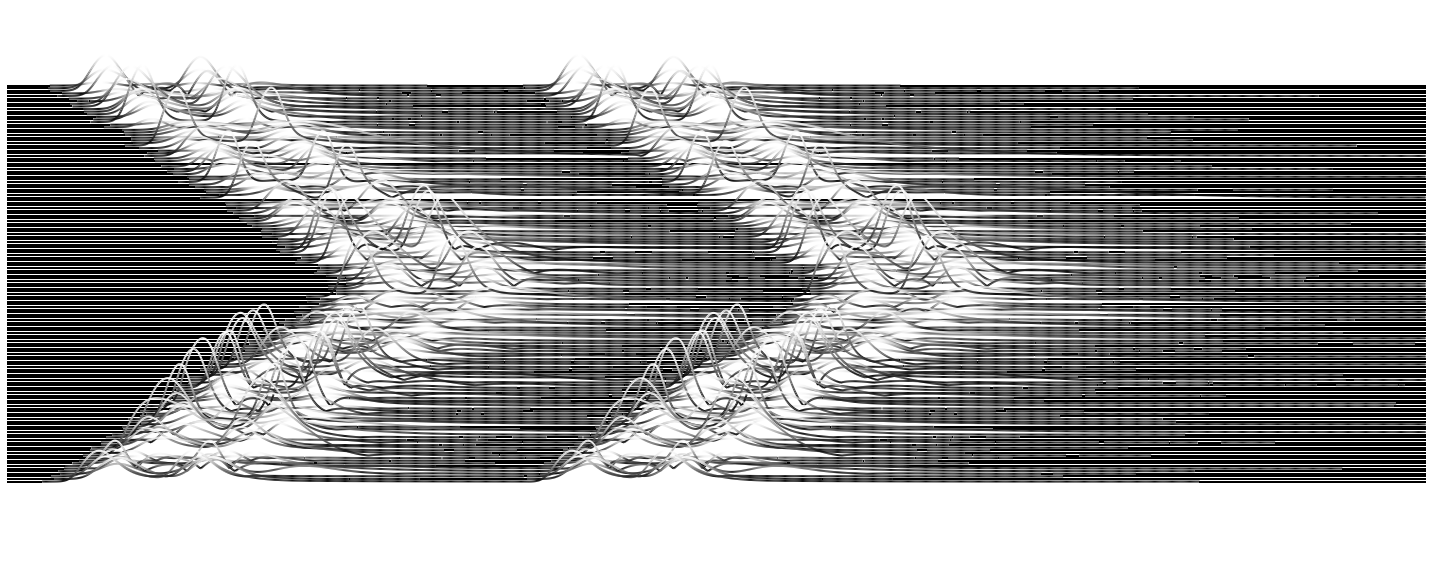

In [11]:
from matplotlib.collections import LineCollection

nn = 1
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
for i, r in enumerate(res):
    for j in range(nn):
        sig = r[:, j]
        y = np.abs(sig) + offset[i] - (5*j)/(nn*(N-1))
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        cy = np.abs(sig)
        norm = plt.Normalize(cy.min(), cy.max())
        lc = LineCollection(segments, cmap='Greys', norm=norm)
        # Set the values used for colormapping
        lc.set_array(cy)
        lc.set_linewidth(2)
        line = ax.add_collection(lc)


ax.set_xlim(x.min(), x.max())
ax.set_ylim(-1, 6)
plt.axis(False)
plt.tight_layout()
plt.show()

fig.savefig("chevrons_w.png", dpi=300, facecolor="white", transparent=True)


from matplotlib.collections import LineCollection

nn = 1
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
for i, r in enumerate(res):
    for j in range(nn):
        sig = r[:, j]
        y = np.abs(sig) + offset[i] - (5*j)/(nn*(N-1))
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        cy = np.abs(sig)
        norm = plt.Normalize(cy.min(), cy.max())
        lc = LineCollection(segments, cmap='Greys_r', norm=norm)
        # Set the values used for colormapping
        lc.set_array(cy)
        lc.set_linewidth(2)
        line = ax.add_collection(lc)


ax.set_xlim(x.min(), x.max())
ax.set_ylim(-1, 6)
plt.axis(False)
plt.tight_layout()
plt.show()

fig.savefig("chevrons_br.png", facecolor="black", dpi=300, transparent=True)